## Tutorial 1: Classic Mean Risk Optimization

## 1. Downloading the data:

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import riskfolio as rp
from openbb_terminal.sdk import openbb

In [2]:
symbols = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

data = openbb.economy.index(symbols, start_date='2016-01-01', end_date='2019-12-30')

In [3]:
Y = data.pct_change().dropna()

display(Y.head())

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.011953,0.017539,0.000180,0.003678,0.020213,-0.020257,0.008284,0.001729,-0.010857,0.028236,...,-0.001730,0.005784,0.004562,0.009483,0.009758,0.013735,0.009305,0.015881,0.006987,0.004057
2016-01-06,-0.009551,-0.010155,-0.007727,-0.001736,0.010589,-0.114863,-0.012051,-0.014436,-0.029144,0.001592,...,-0.007652,-0.011239,-0.018165,-0.035867,-0.015647,-0.009035,-0.012473,0.005547,0.003107,-0.015879
2016-01-07,-0.025394,-0.002699,-0.011047,-0.012207,-0.017408,-0.051388,-0.007577,-0.040440,-0.030020,-0.010411,...,-0.022845,-0.008855,-0.034783,-0.046058,-0.031557,-0.005492,-0.019769,-0.022066,-0.016148,-0.041922
2016-01-08,-0.001649,-0.033839,0.001099,0.005706,0.001720,0.002736,-0.013966,-0.022399,-0.011254,-0.007308,...,-0.001117,-0.016402,0.003067,-0.017642,-0.001448,-0.009719,-0.002241,-0.001539,0.000895,-0.022705
2016-01-11,0.000330,0.014570,0.000915,0.005674,0.020948,-0.043384,-0.014542,-0.001527,-0.019919,0.009869,...,0.005367,0.005287,-0.000574,0.006616,-0.001450,0.005800,-0.011791,0.016436,0.012224,0.001692


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
port = rp.Portfolio(returns=Y)

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(
    method_mu=method_mu, 
    method_cov=method_cov, 
    d=0.94
)

model='Classic'
rm = 'MV'
obj = 'Sharpe'
hist = True
rf = 0
l = 0

w = port.optimization(
    model=model, 
    rm=rm, 
    obj=obj, 
    rf=rf, 
    l=l, 
    hist=hist
)

display(w.T)

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
weights,6.079688e-08,0.071804,1.560681e-07,7.000588e-08,4.276166e-08,1.210985e-08,0.215373,0.08632,1.170853e-07,4.840151e-08,...,8.081945e-07,0.038193,0.175896,5.523711e-08,2.217453e-08,0.042737,0.084805,0.108262,2.942851e-07,0.06159


### 2.2 Plotting portfolio composition

/Users/jason/opt/anaconda3/envs/my_quant_lab/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:605: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


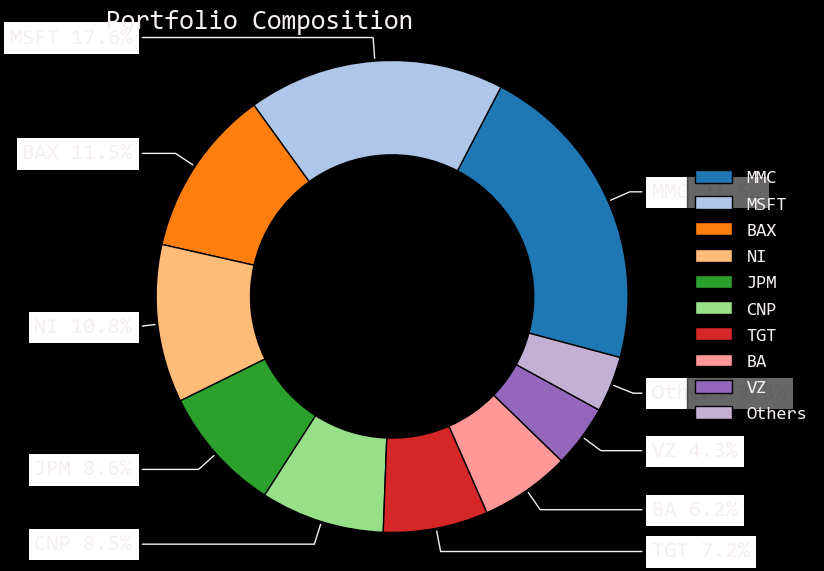

In [5]:
ax = rp.plot_pie(w=w)

### 2.3 Calculate efficient frontier

In [6]:
points = 50

frontier = port.efficient_frontier(
    model=model, 
    rm=rm, 
    points=points, 
    rf=rf, 
    hist=hist
)

display(frontier.T.head())

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
0,2.844616e-02,0.040899,0.021296,0.032270,7.213975e-02,3.720839e-09,0.125799,0.069624,2.052193e-07,0.149247,...,7.735984e-09,0.000743,4.115709e-09,2.817665e-09,1.682658e-03,0.082767,0.069904,0.114530,0.065903,1.884910e-08
1,1.044312e-02,0.055235,0.016844,0.021529,2.884883e-02,1.079279e-10,0.175451,0.088006,1.066531e-09,0.092096,...,6.227761e-09,0.013612,1.662420e-02,3.191371e-10,3.117798e-10,0.087593,0.085601,0.134498,0.055816,2.012475e-02
2,8.803221e-04,0.060539,0.011978,0.017064,9.150178e-03,9.689050e-11,0.192705,0.091226,9.494960e-10,0.064846,...,1.828951e-08,0.017395,3.749365e-02,3.278100e-10,2.564009e-10,0.090041,0.091476,0.142328,0.051002,2.816461e-02
3,5.305578e-10,0.064249,0.005693,0.010811,5.527590e-10,2.481375e-11,0.204543,0.090639,2.391921e-10,0.036631,...,2.248728e-09,0.019316,5.648856e-02,9.117603e-11,6.076311e-11,0.092132,0.095578,0.147708,0.042579,3.430546e-02
4,6.815485e-09,0.067108,0.000004,0.003998,5.347979e-09,5.213929e-10,0.213989,0.090206,4.907101e-09,0.010859,...,4.304877e-08,0.020811,7.339655e-02,2.003437e-09,1.210209e-09,0.092765,0.098874,0.151319,0.033464,3.934257e-02


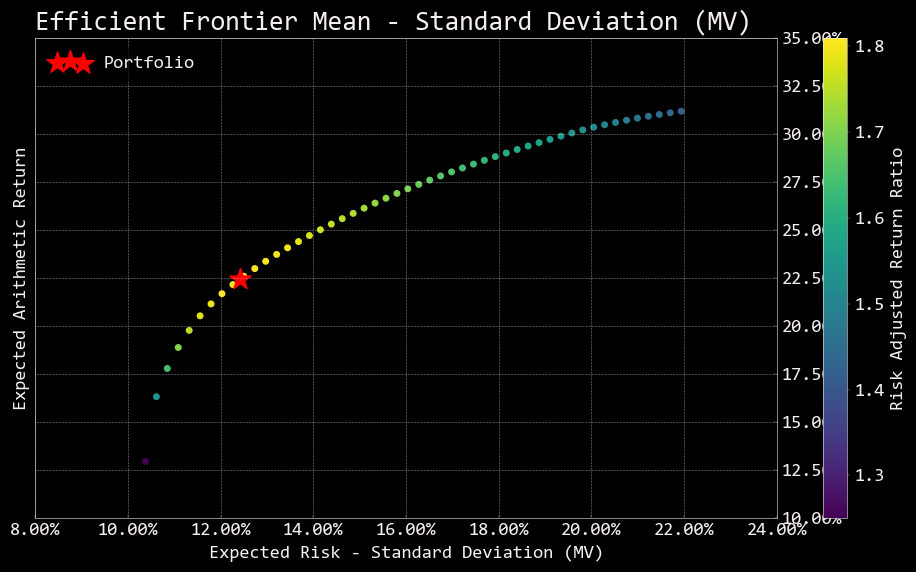

In [8]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(
    w_frontier=frontier, 
    mu=mu, 
    cov=cov, 
    returns=returns, 
    rm=rm,
    rf=rf, 
    w=w,
)

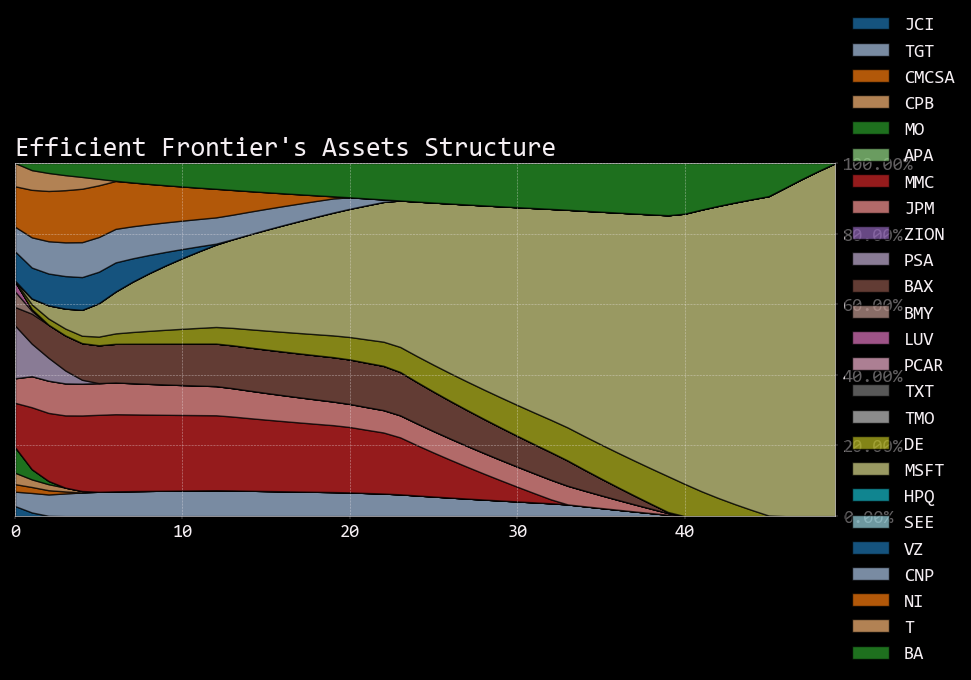

In [9]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(
    w_frontier=frontier,
    cmap="tab20"
)

## 3. Estimating Mean Risk Portfolios

In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

In [10]:
rm = 'CVaR'

w = port.optimization(
    model=model,
    rm=rm,
    obj=obj,
    rf=rf,
    l=l,
    hist=hist
)

display(w.T)

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
weights,4.337871e-12,0.111966,9.569850e-12,5.181079e-12,3.071049e-12,1.084948e-12,0.288218,4.065395e-11,5.477048e-12,5.944406e-12,...,1.239466e-11,0.051437,0.186353,3.187272e-12,1.796788e-12,0.036767,0.074899,0.126864,7.277818e-12,2.689291e-11


### 3.2 Plotting portfolio composition

/Users/jason/opt/anaconda3/envs/my_quant_lab/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:605: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


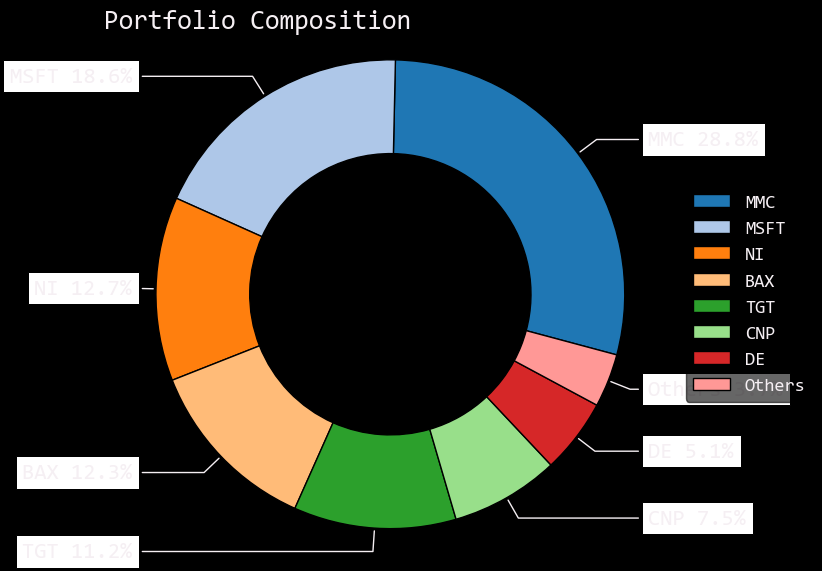

In [11]:
ax = rp.plot_pie(w=w)

### 3.3 Calculate efficient frontier

In [12]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(
    model=model,
    rm=rm,
    points=points,
    rf=rf,
    hist=hist
)

display(frontier.T.head())

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
0,0.040584,0.041821,1.946177e-03,7.995033e-02,3.004664e-02,6.668838e-12,0.183940,9.227456e-11,1.993476e-11,0.206085,...,2.839396e-11,1.497253e-11,2.580775e-11,4.283994e-12,2.111485e-11,0.204700,0.018678,0.069444,3.031848e-02,1.539843e-11
1,0.018857,0.071313,1.159804e-10,4.660399e-02,7.707464e-11,6.594516e-12,0.185648,6.646612e-04,2.271662e-11,0.145023,...,3.314940e-11,1.288279e-10,7.547175e-02,1.148895e-11,1.881874e-11,0.196506,0.058126,0.076677,2.402296e-02,1.042888e-10
2,0.021418,0.065754,2.333984e-12,1.974356e-11,6.519326e-13,7.570767e-14,0.211568,8.173126e-03,3.154054e-13,0.121777,...,7.743616e-13,3.607735e-12,8.426906e-02,1.797332e-13,1.953501e-13,0.194958,0.122795,0.069000,5.922278e-03,1.612167e-12
3,0.004071,0.082853,5.490554e-11,9.450171e-11,3.033037e-11,4.344031e-12,0.230961,2.056226e-02,1.891430e-11,0.104806,...,5.292291e-11,6.428639e-03,1.017247e-01,9.261210e-12,1.045442e-11,0.175792,0.128564,0.074390,4.736314e-11,2.229002e-10
4,0.007572,0.105395,3.224555e-12,7.067510e-12,3.008371e-12,4.152782e-13,0.261251,2.868557e-02,1.794969e-12,0.053126,...,5.891617e-12,4.858895e-11,1.050458e-01,9.398796e-13,8.079422e-13,0.142241,0.134344,0.084880,3.154415e-12,4.098709e-11


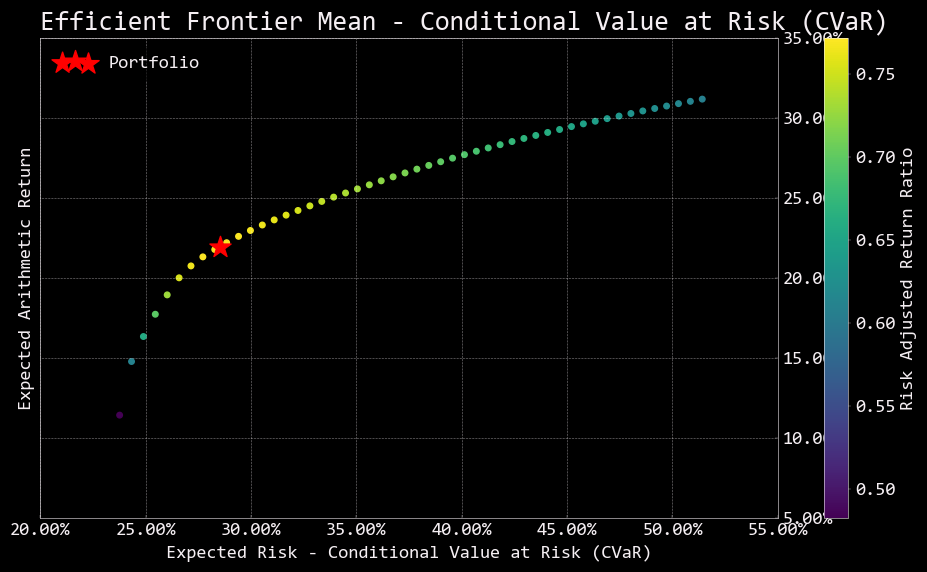

In [13]:
ax = rp.plot_frontier(
    w_frontier=frontier, 
    mu=mu, 
    cov=cov, 
    returns=returns, 
    rm=rm,
    rf=rf, 
    w=w,
)

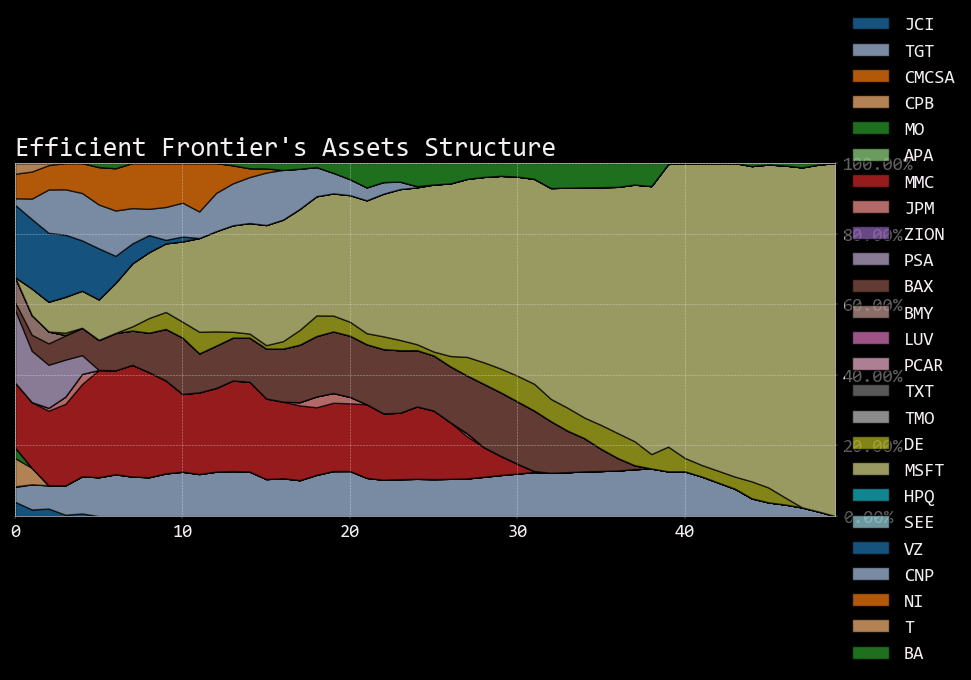

In [15]:
ax = rp.plot_frontier_area(w_frontier=frontier)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [16]:

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

/Users/jason/opt/anaconda3/envs/my_quant_lab/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [17]:

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
TGT,7.18%,4.73%,8.91%,5.60%,9.26%,11.20%,14.00%,15.63%,0.00%,1.49%,0.00%,0.49%,0.40%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.37%,0.00%,0.00%,0.00%,0.00%,0.00%
MO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
MMC,21.54%,14.12%,21.24%,13.93%,21.58%,28.82%,15.59%,31.77%,0.00%,17.66%,7.46%,15.14%,0.00%
JPM,8.63%,14.71%,8.82%,17.80%,8.46%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ZION,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot: >

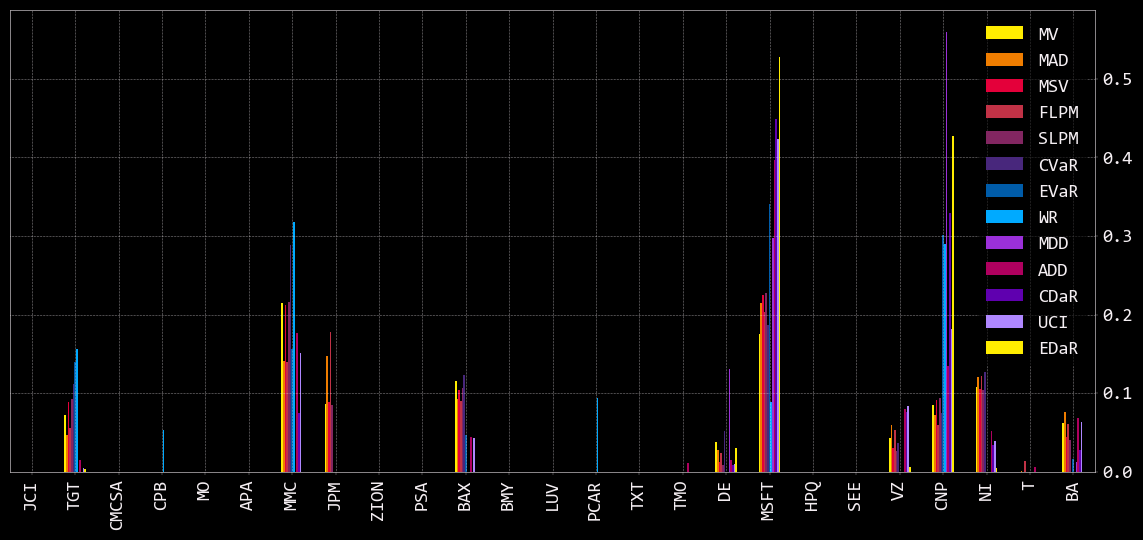

In [20]:
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4. Constraints on Assets and Assets Classes

### 4.1 Creating the constraints

In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [21]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,0.1,,,,
1,False,Classes,Industry,Financials,<=,0.2,,,,
2,False,Classes,Industry,Utilities,<=,0.2,,,,
3,False,Classes,Industry,Industrials,<=,0.2,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,0.2,,,,


In [22]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 Optimize the portfolio with the constraints

In [24]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(
    model=model,
    rm=rm,
    obj=obj,
    rf=rf,
    l=l,
    hist=hist
)

display(w.T)

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
weights,3.244161e-07,0.03816,0.057835,3.238208e-07,3.697800e-08,5.527063e-09,0.1,0.0572,0.052884,8.567175e-08,...,0.1,0.04578,0.1,0.007782,1.212814e-08,0.1,0.1,0.09702,0.059314,0.021471


/Users/jason/opt/anaconda3/envs/my_quant_lab/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:605: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


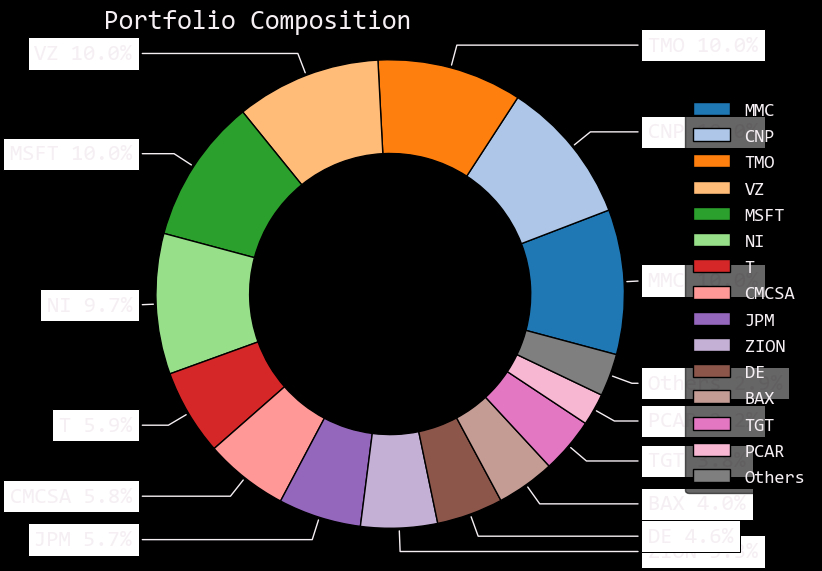

In [25]:
ax = rp.plot_pie(w=w)

In [26]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Industry,weights
APA,Energy,5.527063e-09
BA,Financials,2.147065e-02
BAX,Health Care,4.036959e-02
BMY,Health Care,1.157707e-08
CMCSA,Consumer Discretionary,5.783458e-02
CNP,Utilities,9.999997e-02
CPB,Consumer Staples,3.238208e-07
DE,Industrials,4.578049e-02
HPQ,Information Technology,7.782178e-03
JCI,Consumer Discretionary,3.244161e-07


In [28]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,9.599477e-02
Consumer Staples,3.607988e-07
Energy,5.527063e-09
Financials,2.315548e-01
Health Care,4.036960e-02
Health care,9.999996e-02
Industrials,6.796486e-02
Information Technology,1.077821e-01
Materials,1.212814e-08


/Users/jason/opt/anaconda3/envs/my_quant_lab/lib/python3.9/site-packages/riskfolio/src/PlotFunctions.py:605: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


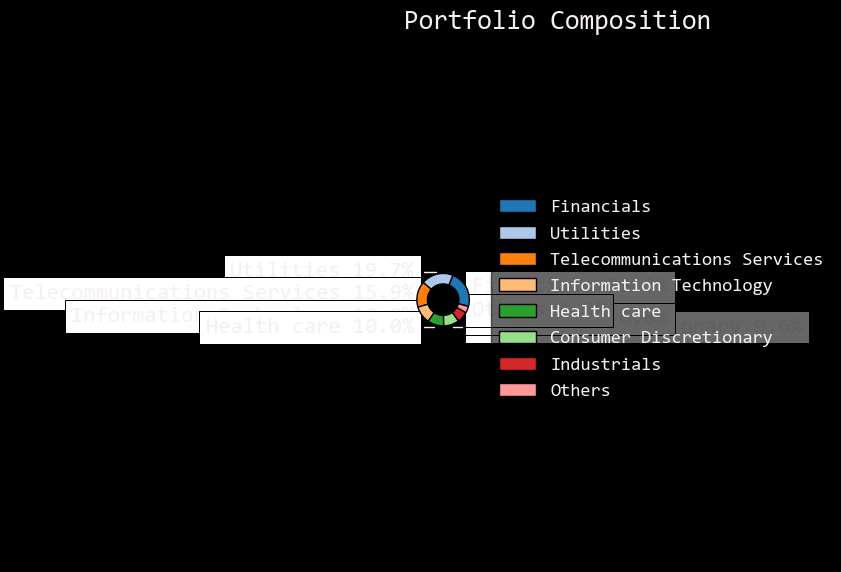

In [29]:
ax = rp.plot_pie(w=w_classes)